In [ ]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [ ]:
# 2.Load Dataset
data = pd.read_csv("./drive/MyDrive/data/gdp_vn_data.csv")
data

,Year,GDP
0,2000,302
1,2001,315
2,2002,340
3,2003,389
4,2004,453
5,2005,537
6,2006,624
7,2007,730
8,2008,1065
9,2009,1132


In [ ]:
#kích thước dữ liệu
data.shape
data.info()
#Mô tả bộ dữ liệu
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    21 non-null     int64
 1   GDP     21 non-null     int64
dtypes: int64(2)
memory usage: 464.0 bytes


,Year,GDP
count,21.000000,21.000000
mean,2010.000000,1341.857143
std,6.204837,832.913818
min,2000.000000,302.000000
25%,2005.000000,537.000000
50%,2010.000000,1234.000000
75%,2015.000000,2009.000000
max,2020.000000,2679.000000


In [ ]:
#Chọn thuộc tính
data = data[['GDP']]
data = data.dropna()
# data = data.reset_index(drop=True)
data

,GDP
0,302
1,315
2,340
3,389
4,453
5,537
6,624
7,730
8,1065
9,1132


<Axes: >

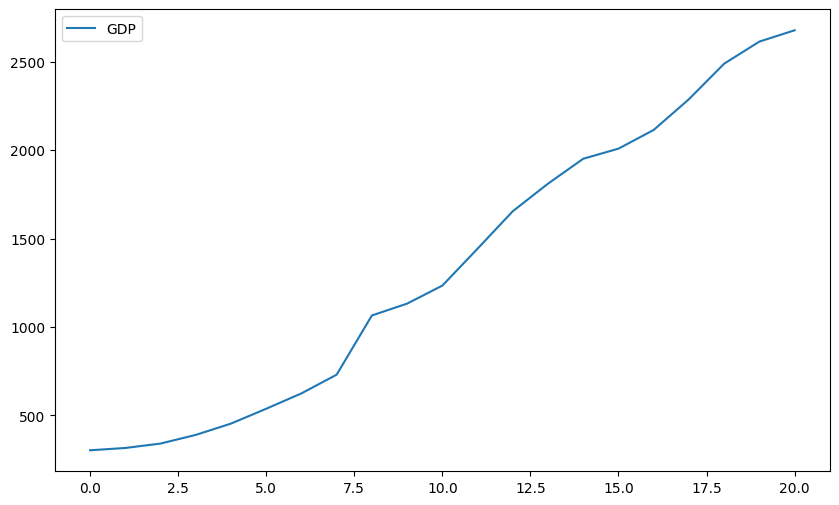

In [ ]:
data.plot(figsize=(10,6))

In [ ]:
# Chia tập dữ liệu thành train, test (90-10)
# Tính số lượng mẫu tương ứng với từng tập
train_size = int(0.9 * len(data))
test_size = int(0.1 * len(data))

# Chia dữ liệu thành các tập
train_data = data[:train_size]
test_data = data[train_size:train_size+test_size]

# Kiểm tra kích thước của từng tập
print("Train data size:", train_data)
print("Test data size:", len(test_data))

Train data size:      GDP
0    302
1    315
2    340
3    389
4    453
5    537
6    624
7    730
8   1065
9   1132
10  1234
11  1443
12  1655
13  1811
14  1952
15  2009
16  2115
17  2289
Test data size: 2


In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.7 MB/s eta 0:00:00


In [ ]:
# Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['GDP'])

# Train model
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=207.619, Time=0.67 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=200.730, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=202.027, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=201.969, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=218.497, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=203.918, Time=0.11 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.951 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True)

In [ ]:
# Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['GDP'])
y_pred = model.predict(n_periods=len(y_test))

In [ ]:
# 6. Quá trình tạo index predict 7 năm tiếp theo
last_index =  data.index[-1]
next_7_years_index = pd.RangeIndex(start=last_index, stop=last_index+7, step=1)

# Tạo mảng 7 năm
x_next_7_years = np.array(range(last_index+1, last_index+8)).reshape(-1, 1)

# Dự đoán 7 năm tiếp theo
y_next_7_years = model.predict(n_periods=len(x_next_7_years))

# In ra dự đoán GDP trong 7 năm tiếp theo
print('Predicted GDP for the next 7 years:')
print(y_next_7_years)

Predicted GDP for the next 7 years:
[2405.88235294 2522.76470588 2639.64705882 2756.52941176 2873.41176471
 2990.29411765 3107.17647059]


In [ ]:
# Đánh giá độ chính xác validate, test
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)

Testing RMSE: 88.26983637597161


In [ ]:
# MAPE
mape_test = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('Testing MAPE:', mape_test)

Testing MAPE: 3.4526905281682287


In [ ]:
# MAE
mae_test = np.mean(np.abs(y_test - y_pred))
print("Testing MAE:", mae_test)

Testing MAE: 88.17647058823513


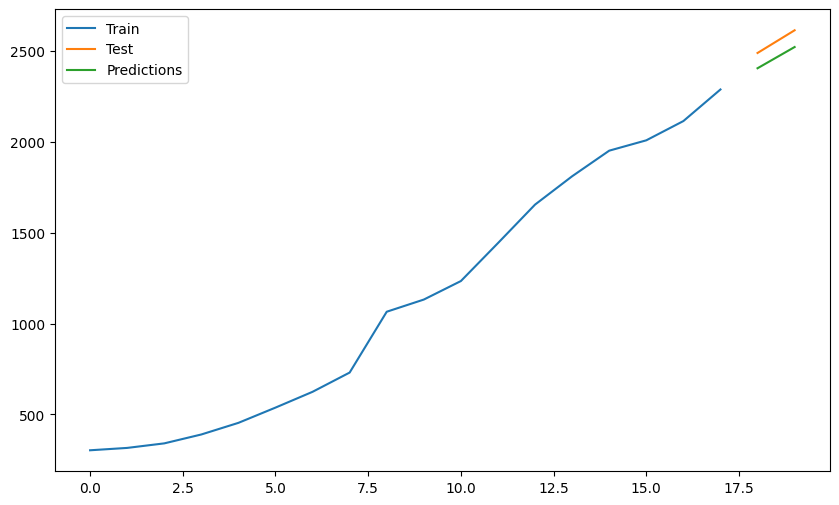

In [ ]:
# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['GDP'])
plt.plot(test_data.index, test_data['GDP'])
plt.plot(test_data.index, y_pred)
plt.legend(['Train', 'Test','Predictions'])
plt.show()

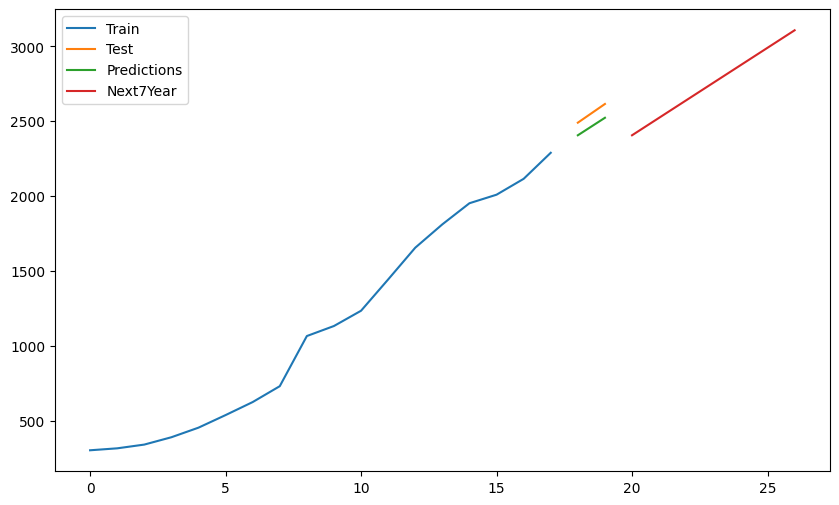

In [ ]:
# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['GDP'])
plt.plot(test_data.index, test_data['GDP'])
plt.plot(test_data.index, y_pred)
plt.plot(next_7_years_index,y_next_7_years)
plt.legend(['Train', 'Test', 'Predictions', 'Next7Year'])
plt.show()

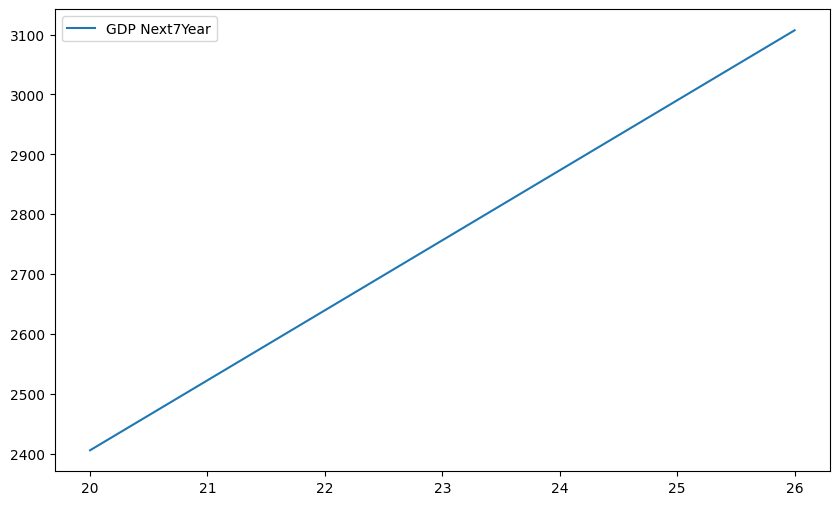

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(next_7_years_index,y_next_7_years)
plt.legend(['GDP Next7Year'])
plt.show()